# **$t$-Stochastic Neighbor Embedding ($t$-SNE)**

The **$t$-SNE** method by [van der Maaten and Hinton, 2008](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbcl) is a complex method that
builds over and addresses the shortcomings of its precursor, the **Stochastic Neighbor
Embedding (SNE)** method by [Hinton and Roweis, 2002](https://proceedings.neurips.cc/paper_files/paper/2002/file/6150ccc6069bea6b5716254057a194ef-Paper.pdf). Overall, **$t$-SNE** is considered the **state-of-the-art** in geometric dimensionality reduction and visualization algorithms.

[Note: **Geoffrey Hinton** received the Nobel Prize in Physics in 2024, together with **John Hopfield**, for their contributions to neural networks and artificial intelligence]

## **Stochastic Neighbor Embedding (SNE)**

According to the authors, the **SNE** method is:
> *a **probabilistic approach** to the task of placing objects, **described**
by **high-dimensional vectors** or by **pairwise dissimilarities**, in a
**low-dimensional space** in a way that **preserves neighbor identities**. A
**Gaussian** is centered on each object in the high-dimensional space and
the densities under this Gaussian (or the given dissimilarities) are used
to define a probability distribution over all the potential neighbors of
the object. The aim of the **embedding** is to **approximate this distribution**
as well as possible when the same operation is performed on the
low-dimensional “images” of the objects. A natural cost function is a
sum of **Kullback-Leibler divergences**, one per object, which leads to a
simple gradient for adjusting the positions of the low-dimensional images.
Unlike other dimensionality reduction methods, this probabilistic
framework makes it easy to represent each object by a mixture of widely
separated low-dimensional images.*

**Stochastic Neighbor Embedding (SNE)** starts by converting the **high-dimensional Euclidean distances** between datapoints into **conditional probabilities** that represent **similarities**.

So, given $n$ data points $x_1, x_2,\ldots, x_n$ in some higher-dimensional space $\mathbb{R}^d$ , the **SNE algorithm** associates to each point $x_i$ (a base point) a **probability distribution** $P_i$ obtained from the points in the dataset.

These distributions are in general **different** for each of the points since they **depend on the distances** from the base point to the other points.

More specifically, $P_i$ is a **Gaussian distribution** centered at base point $x_i$ and determined by some standard deviation $\sigma_i$ to be determined later.


The **similarity** of datapoint $x_j$ to datapoint $x_i$ is the **conditional probability**, $p_{j|i}$, that $x_i$ would pick $x_j$ as its neighbor
if neighbors were picked in proportion to their probability density under a Gaussian centered at $x_i$.

> For nearby datapoints, $p_{j|i}$ is relatively high, whereas for widely separated datapoints, $p_{j|i}$ will be almost infinitesimal (for reasonable values of the variance of the Gaussian, $\sigma_i$).

Mathematically, the conditional probability $p_{j|i}$ is given by

$$ p_{j|i} = \frac{e^{-\frac{||x_i-x_j||^2}{2\sigma_i^2} }   }{\sum_{l\neq i}{e^{-\frac{||x_i-x_l||^2}{2\sigma_i^2} }}  }=\frac{e^{-\frac{d_{i,j}^2}{2\sigma_i^2} }   }{\sum_{l\neq i}{e^{-\frac{d_{i,l}^2}{2\sigma_i^2} }}  } $$

while the value $p_{i|i}$  is set to 0 since the method is interested in modeling dissimilarities between different points.

Now, let $y_i$ denote the point in the lower-dimensional space $\mathbb{R}^k$ (with $k<<d$) that $x_i$ is to be mapped to.

Similar probability distributions $Q_i$ with probabilities $q_{j|i}$ for the **mapped points** are set with the provision that the variance for the $i$th point $y_i$ equals $\frac{1}{\sqrt{2}}$ and thus

$$ q_{j|i} = \frac{e^{-||y_i-y_j||^2 }   }{\sum_{l\neq i} e^{-||y_i-y_l||^2 }  } $$

Again, since we are only interested in modeling pairwise similarities, we set $q_{i|i}=0$.

The **variance** in the **lower-dimensional space** is **constant** $(\frac{1}{\sqrt{2}})$ for all the points but may possibly differ from the variances $\sigma_i^2$ in the higher- dimensional space.

Therefore, even if SNE maps points from $\mathbb{R}^d$ to $\mathbb{R}^d$, it will not necessarily map them to the same points.

If the map points $y_i$ and $y_j$ (in $\mathbb{R}^k$) correctly **model the similarity** between the high-dimensional datapoints $x_i$ and $x_j$ (in $\mathbb{R}^d$), the conditional probabilities $p_{j|i}$ and $q_{j|i}$ will be equal.  Motivated by this observation, **SNE** aims to find a low-dimensional data representation that **minimizes the mismatch** between $p_{j|i}$ and $q_{j|i}$.

The **SNE algorithm** attempts to find the points $y_i$ so that the **sum of the
Kullback-Leibler (KL) divergence** (a measure of the dissimilarity of two probability
distributions) of the distributions $P_i$ and $Q_i$ is **minimized**, i.e., so that

\begin{eqnarray}
C &=& \sum_i KL(P_i || Q_i)\\
&=& \sum_i \sum_j p_{j|i} \log{\frac{p_{j|i}}{q_{j|i}}}
\end{eqnarray}

is as small as possible.

SNE minimizes the sum of Kullback-Leibler divergences over all datapoints using a **gradient descent method**.

However, this **KL divergence is not a distance function** between distributions because it is asymmetric and does not satisfy the triangle inequality.

Lack of symmetry causes this loss function to **penalize close together points** by **mapping them to far-off points** more than vice versa. In other words, the **SNE cost function** focuses on **retaining the local structure** of the data in the map (for reasonable values of the variance of the Gaussian in the high-dimensional space, $\sigma_i$).



Ideally, one would like to have a perfect match: $q_{j|i} = p_{j|i}$, but this does not usually happen; hence, the **penalty** term $p_{j|i} \log{\frac{p_{j|i}}{q_{j|i}}}$ in $C$.

The **loss function** is affected much more when $p_{j|i}$ is small and $q_{j|i}$ is large than vice versa. Intuitively, this means that the **SNE cost function** is really trying to **preserve the local structure** of the data, **ignoring the global structure** to some extent.

Now, how to choose $\sigma_i$? A single value of $\sigma_i$ is probably not optimal for all data points.

Usually, **smaller values** of $\sigma_i$ are more appropriate in **denser regions** than in
sparser regions of the data.


Any particular value of $\sigma_i$ induces a probability distribution, $P_i$, over all of the other datapoints. This distribution has an entropy which increases as $\sigma_i$ increases. **SNE** performs a **binary search** for the value of $\sigma_i$ that produces a $P_i$ with a fixed ***perplexity*** that is specified by the user.


Using the **Shannon entropy** $H(P_i)$
of the distribution $P_i$, the quantity

$$Perp(P_i) = 2^{H(P_i)}$$

is called as the [**perplexity**](https://en.wikipedia.org/wiki/Perplexity) of the distribution $P_i$.

It **increases monotonically** with
$\sigma_i$. The **perplexity** can be interpreted as a **smooth measure** of the **effective number of neighbors**; typical values range between 5 and 50.



#### **Optimization phase**

The minimization of the loss function $C$ is done by **gradient descent** since the
gradient is
$$\frac{\partial C}{\partial y_i} = 2\sum_j \left(p_{j|i}-q_{j|i} + p_{i|j}-q_{i|j} \right)\left(y_i-y_j \right)$$

This gradient has a nice **physical interpretation**, as the **resultant force** exerted by a **set of springs** between the **map point** $y_i$ and all other map points $y_j$.

The spring between $y_i$ and $y_j$ exerts
a force on $y_j$ along the direction $(y_i - y_j)$, and it causes an attraction or repulsion
based on the mismatch value
$$p_{j|i}- q_{j|i} + p_{i|j} - q_{i|j}$$

For example, if $x_i$, $x_j$ are
very close, $p_{j |i}$ and $p_{i|j}$ are large. If $y_i$, $y_j$ are far apart, i.e., $q_{j|i}$ and $q_{i|j}$ are small,
then the force,
$$\left(p_{j|i}- q_{j|i} + p_{i|j} - q_{i|j}\right)\left(y_i-y_j\right)$$

is attractive and tries to bring $y_j$ closer to $y_i$.



To **initialize** the gradient descent
algorithm, $n$ points are **sampled randomly** in $\mathbb{R}^k$ from an **isotropic Gaussian
distribution**  with mean at the origin, i.e., a multivariate distribution with marginals
independent ($\Sigma = σ^2 \textbf{I}$) and Gaussian with the same standard deviation and mean 0.

Then the $y_i$s are repeatedly updated as

$$y_i^{(t)} \leftarrow y_i^{(t-1)}+\eta\left( \frac{\partial C}{\partial y_i}\right)_{y_i=y_i^{(t-1)}} +\alpha(t) \left(y_i^{(t-1)}- y_i^{(t-2)} \right) $$

where $\eta$ is the **learning rate** and $\alpha(t)$ is the **momentum** at iteration t .

The effect of the **momentum term** is to effectively add a decaying sum of the previous gradients.

In addition, in the **early iterations** of the optimization, **Gaussian noise** is added after each iteration. Gradually reducing the variance of this noise (similar to [simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing#:~:text=Simulated%20annealing%20(SA)%20is%20a,can%20find%20the%20global%20optimum.)) helps the algorithm drive the candidate solution out of *wells* about local minima.

> If the variance of the noise changes very slowly at the critical point at which the global structure of the map starts to form, SNE tends to find maps with a better global organization. Unfortunately, this requires sensible choices of the **initial amount of Gaussian noise** and the **rate** at which it **decays**. Moreover, these choices interact with the amount of **momentum** and the **step size** that are employed in the gradient descent. It is therefore common **to run** the optimization **several times** on a data set
to find appropriate values for the parameters.

[**Note**: SNE can also be applied to data sets that consist of **pairwise similarities** between objects rather than high-dimensional vector representations of each object, provided **these simiarities** can be **interpreted as conditional probabilities**. For example, human word association data consists of the probability of producing each possible word in response to a given word, as a result of which it is already in the form required by SNE.]

## **Stochastic Neighbor Embedding ($t$-SNE)**

Although SNE constructs reasonably good visualizations, it is hampered by a cost function that is difficult to optimize. To alleviate this problem, the **$t$-SNE** was creted.

The variant of SNE, the **$t$-distributed SNE algorithm ($t$-SNE)** differs from **SNE**
as follows.



> First, **it breaks asymmetry** between $p_{i|j}$ and $p_{j|i}$ by introducing
$$p_{ij} = \frac{p_{i|j} +p_{j|i}}{2n}$$



> Second,it uses a **Student-$t$ distribution** (with one degree of freedom, which is the same as a **Cauchy distribution**) rather than a Gaussian to compute the similarity between two points **in the low-dimensional space**. Using this distribution, the joint probabilities $q_{ij}$ are defined as
$$q_{ij} = \frac{\left(1+||y_i-y_j||^2\right)^{-1}}{\sum_{k\neq l}{\left(1+||y_k-y_l||^2\right)^{-1}}}$$
while keeping $p_{ii}$ and $q_{ii}$ equal to 0.


> Finally, instead of using different distributions $P_i$, $Q_i$ one for each input and base point, it uses **a single common distribution** called  $P$ on $[n] \times [n]$ and $Q$ (for the mapped points).

The cost function is now the **KL divergence** given

\begin{eqnarray}
C &=& \sum_i KL(P || Q)\\
&=& \sum_i \sum_j p_{ij} \log{\frac{p_{ij}}{q_{ij}}}
\end{eqnarray}

The reasons for the different choices made by the t-SNE algorithm are:

**1.** The $p_{i|j}$ and $p_{j|i}$ to $p_{ij}$ are now **symmetrized**. The proposed symmetrization ensures
$$\sum_j p_{ij} > \frac{1}{2}n$$
for all points $x_i$, so that each point has some reasonable effect on the cost function.

**2.** This type of dimensionality reduction runs into the so-called **crowding problem**,
i.e., in high dimension $d$, the volume of a ball of radius $r$ scales as $r^d$.

This implies that if the points are packed inside such a ball, say all at least $\frac{r}{2}$ from each other, one could pack about $4d$ such points inside the ball, a nice and tight cluster (a **crowd**) in the input data near $x_i$.

In order **to map** this to **a lower
dimension** $k$, one cannot pack all of the crowd inside a ball of radius $r$ because
such a ball will only contain about $4k$ such points.

Thus, **any mapping** to $\mathbb{R}^k$ will
push some points farther off from the center of the ball, i.e., many distances will
be much larger than, say $r$.

Going back to the **spring metaphor**, there are many springs now that are very stretched, and therefore exert a large force on $y_i$. To
be in equilibrium, $y_i$ must be pushed somewhat to the center.

Thus, the centers of all such tight clusters get pushed to the center and therefore closer to each other. This is counterproductive since now **different clusters start to merge** into
each other.

To alleviate this challenging problem, the **$t$-SNE algorithm** employs a **heavy tailed distribution**, like the **Student's** $t$ with 1 degree of freedom (i.e., the
**Cauchy distribution**).

In a **higher-dimensional space**, a **Gaussian** is used to define the probabilities. By using a **heavy tailed distribution** in the **lower-dimensional
space**, a moderate distance is allowed within the cluster to be adequately modeled
by a large distance in the lower-dimensional space.

Thus the **compact cluster** naturally **expands** into a **larger, low-dimensional cluster**. The net effect  is that the attractive forces are not too large and do not force $y_i$ too much to the center. The resulting map clusters the data much better.

**3.** There are other reasons too for using the **Student $t$-distribution**. It has been shown that **it is an infinite mixture of Gaussians** and is therefore closely related to the Gaussian distribution. It is also **faster to evaluate** since no exponentials are involved.

The final form of **$t$-SNE** requires the perplexity $Perp$, the maximum number of
iterations $T$, a learning rate $\eta$, and a momentum $\alpha(t)$.

It then proceeds as follows:

1. It computes $p_{i|j}$ and perplexity $Perp$ and sets
$$p_{ij} = \frac{p_{j |i} +p_{i|j}}{2n}$$

2. It samples an initial solution
$$Y(0) = (y_1(0), \ldots, y_n(0))$$
where each $y_i(0)$ is sampled from the **standard normal distribution** $N(0, 10^{4}I)$.

3. It repeats:
  -  It computes
  $$q_{ij} = \frac{\left(1+||y_i-y_j||^2\right)^{-1}}{\sum_{k\neq l}{\left(1+||y_k-y_l||^2\right)^{-1}}}$$
  - It computes the loss function $C$ and its gradient
  $$\frac{\partial c}{\partial y_i} = 4 \sum_j (p_{ij}-q_{ij})(y_i-y_j)(1+||y_i-y_j||^2)^{-1}$$
  - It updates
  $$Y_i^{(t)} \leftarrow Y_i^{(t-1)}+\eta\left( \frac{\partial C}{\partial Y}\right)_{Y=Y{(t-1)}} +\alpha(t) \left(Y^{(t-1)}- Y^{(t-2)} \right) $$
  where
  $$\frac{\partial C}{\partial Y}= \left(\frac{\partial C}{\partial y_i}, \ldots,  \frac{\partial C}{\partial y_i} \right)$$
  for $t=1,2,\ldots, T$.

# **Example**

# Comparison of dimensionality reduction methods using digit datasets

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.decomposition import PCA

In [ ]:
# Load dataset
digits = load_digits()
X = digits.data
y = digits.target
target_names = digits.target_names

In [ ]:
X.shape

(1797, 64)

In [ ]:
# Create models
d = 2
seed = 1
methods = {"PCA": PCA(n_components=d),
           "MDS": MDS(n_components=d, random_state=seed,
                      max_iter=100,
                      n_init=4),
           "ISOMAP": Isomap(n_components=d, n_neighbors=20),
           "tSNE": TSNE(n_components=d,
                        perplexity=30,
                        random_state=seed)
         }

In [ ]:
# Fitting models
results = {}
for name, method in methods.items():
  t = time()
  print(f"Run {name} method")
  X_proj = method.fit_transform(X)
  results[name] = pd.DataFrame(X_proj, y,  columns=['x', 'y'])
  results[name]['label'] = y
  print(f"Time: {np.round(time()-t,3)}s\n")

Run PCA method
Time: 0.009s

Run MDS method
Time: 34.237s

Run ISOMAP method
Time: 2.453s

Run tSNE method
Time: 13.209s



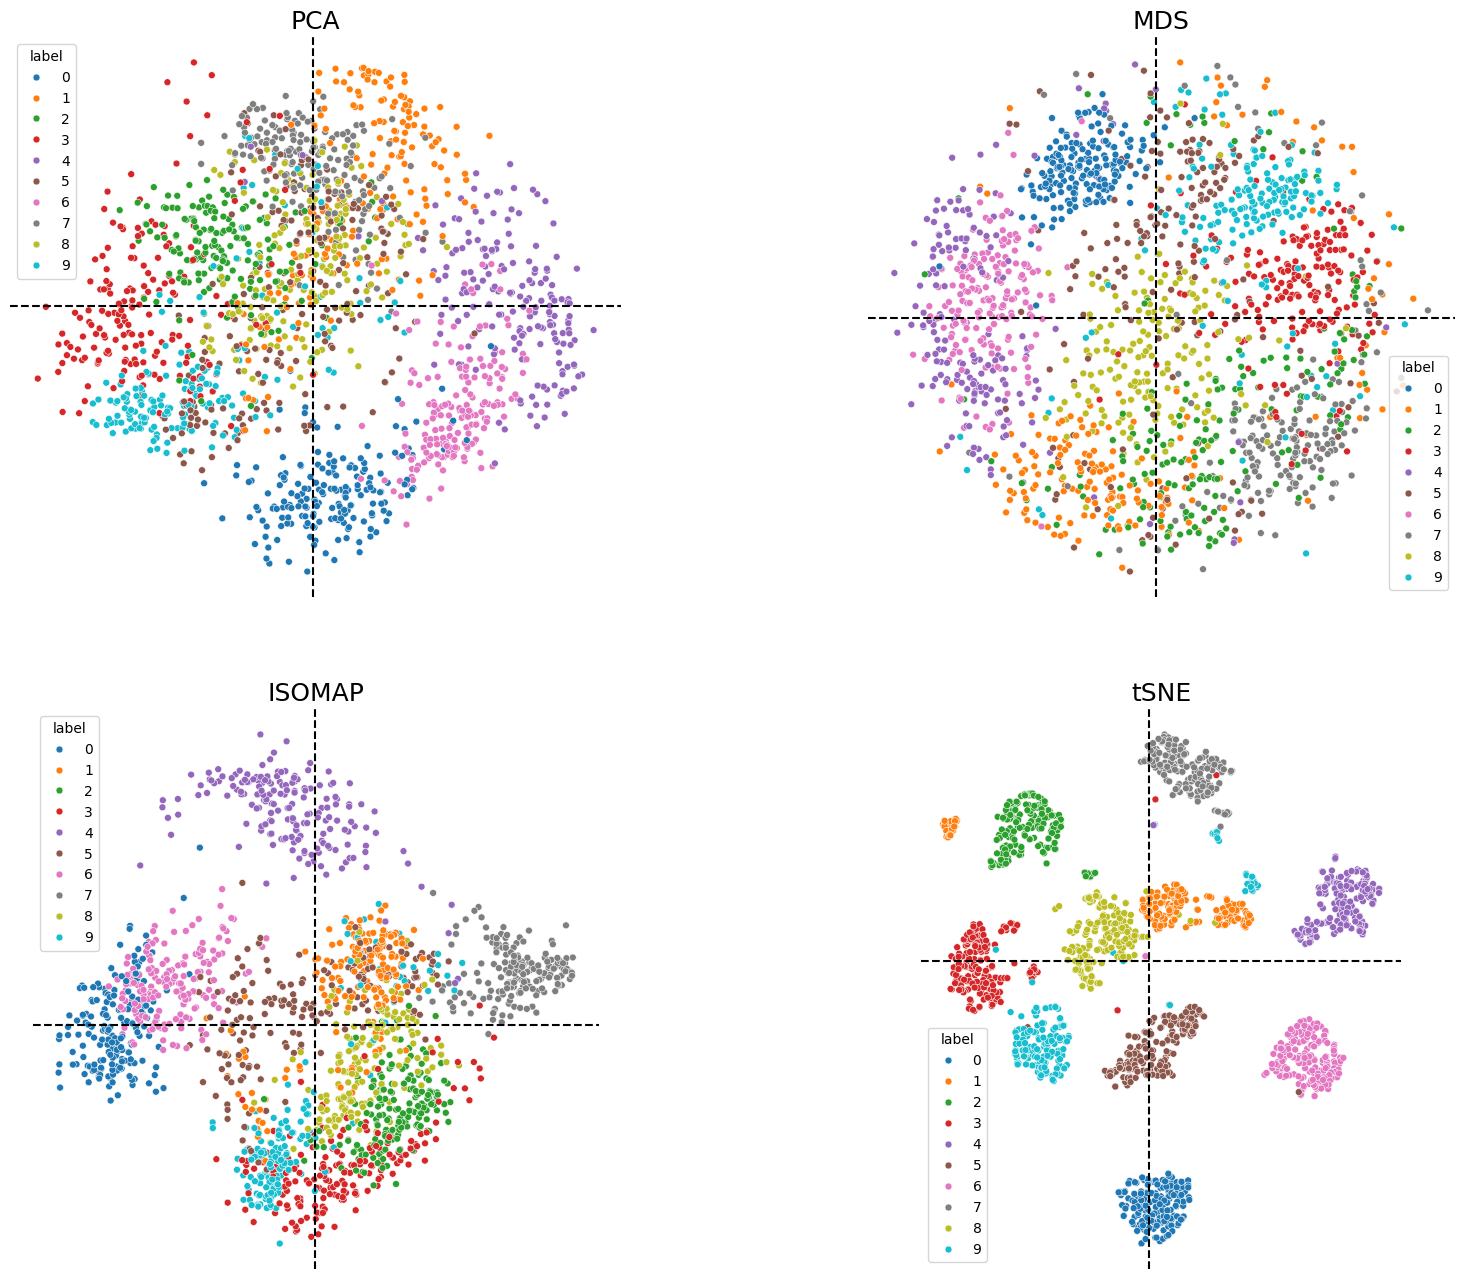

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
for ax, name in zip(axs.flatten(), results.keys()):
  sns.scatterplot(
    data=results[name],
    x='x', y='y',
    hue='label',
    palette='tab10',
    s=25,
    ax=ax,
    legend=True
  )
  ax.set_title(name, fontsize=18)
  ax.axvline(0, linestyle='--', color="black")
  ax.axhline(0, linestyle='--', color="black")
  ax.axis("off")
  ax.set_aspect("equal")
plt.show()